# Art as Data

[Project extensions are at the bottom of this file]

Piet Mondrian was a Dutch artist best known for his abstract, grid-like designs during the 1920s and 30s. Mondrian was part of an art movement that aimed to explore and express simplicity by using only the most basic colors and shapes.

How might we represent the features of a Mondrian painting using tabular data? Here is one approach:

| painting_id | feature | x   | y   | width | height | color  | rgb      |
|------------|---------|-----|-----|-------|--------|--------|----------|
| b219       | rect    | 0   | 0   | 121   | 152    | white  | #ffffff  |
| b219       | rect    | 132 | 0   | 378   | 365    | red    | #e6151a  |
| b219       | rect    | 0   | 173 | 121   | 192    | white  | #ffffff  |
| b219       | rect    | 0   | 377 | 121   | 133    | blue   | #2f5a9f  |
| b219       | rect    | 132 | 377 | 335   | 133    | white  | #ffffff  |
| b219       | rect    | 479 | 377 | 31    | 59     | white  | #ffffff  |
| b219       | rect    | 479 | 451 | 31    | 59     | yellow | #f7ed2d  |
| b219       | h-line  | 0   | 365 | 510   | 12     | black  | #000000  |
| b219       | v-line  | 121 | 0   | 11    | 510    | black  | #000000  |
| b219       | v-line  | 467 | 377 | 12    | 133    | black  | #000000  |
| b219       | h-line  | 0   | 152 | 121   | 21     | black  | #000000  |
| b219       | h-line  | 479 | 436 | 31    | 15     | black  | #000000  |

This table represents the features of the painting using 12 rows of data. Notice how each row represents a rectangular shape with x-y coordinates, size and color info.

By representing art as data, we open up artistic analysis to a broad range of data science techniques. In this project, we will explore Mondrian's quest for artistic simplicity and try our hands at detecting fake paintings falsely attributed to Mondrian.

### Loading the Data
The `mondrian-painting-features.csv` file contains digitized features for 136 Mondrian paintings over the 2 decades from 1920 to 1940. Load the data into python and take a look.

Activity Goals:
- Import pandas.
- Load the features data.
- Display the dataframe.

In [2]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'mondrian-painting-features.csv', 'mondrian-painting-info.csv', and 'fp26-features.csv'.

# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
pd.options.display.max_rows = 10

features = pd.read_csv('mondrian-painting-features.csv')
features

,painting_id,feature,x,y,width,height,color,rgb
0,b104,rect,0,0,146,13,white,#ced2ca
1,b104,rect,151,0,576,13,gray,#a4a7a7
2,b104,rect,732,0,278,129,gray,#c8c9c7
3,b104,rect,0,18,146,468,white,#cfd0ce
4,b104,rect,151,18,107,111,black,#151d16
...,...,...,...,...,...,...,...,...
3199,b296,v-line,620,0,19,825,black,#000000
3200,b296,v-line,49,508,19,79,black,#000000
3201,b296,h-line,0,268,711,19,black,#000000
3202,b296,h-line,0,489,711,19,black,#000000


The first painting in this dataset has an ID of b104. We can see that there are multiple rows with that same painting ID.

Let's use a `query` to extract all the features associated with that first painting.

Activity Goal:
- Find all the features for painting b104.

In [4]:
features.query('painting_id == "b104"')

,painting_id,feature,x,y,width,height,color,rgb
0,b104,rect,0,0,146,13,white,#ced2ca
1,b104,rect,151,0,576,13,gray,#a4a7a7
2,b104,rect,732,0,278,129,gray,#c8c9c7
3,b104,rect,0,18,146,468,white,#cfd0ce
4,b104,rect,151,18,107,111,black,#151d16
...,...,...,...,...,...,...,...,...
36,b104,v-line,727,0,5,1007,black,#000000
37,b104,v-line,258,18,5,111,black,#000000
38,b104,v-line,531,134,5,809,black,#000000
39,b104,v-line,944,134,5,873,black,#000000


From this we see that painting b104 has 41 features.

We have got the features for this painting, but what if we are interested in the year it was painted?

For that, we need to load up a separate data file: `mondrian-painting-info.csv`.

Activity Goals:
- Load the painting info data.
- Display the dataframe.

In [5]:
painting_info = pd.read_csv('mondrian-painting-info.csv')
painting_info

,painting_id,year,title,width,height
0,b104,1920,No. VI,1010,1007
1,b105,1920,Composition A,918,900
2,b106,1920,Composition B,575,677
3,b107,1920,Composition C,610,603
4,b108,1920,Composition I,646,750
...,...,...,...,...,...
131,b292,1939,Composition no. 1,1023,1052
132,b293,1939,"Composition of red, blue and white: II",330,435
133,b294,1939,Trafalgar Square,1200,1452
134,b295,1939,Composition no. 8,681,752


Each row represents one painting. Now we see that b104 was painted in the year 1920. Later, when we calculate painting metrics, we'll merge additional columns onto this `painting_info` dataframe.

### Turning Data into Pictures
For this project, we've provided the following function to draw Mondrian paintings from data:


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def draw_mondrian( painting_id ):
    rects = features.query('painting_id == @painting_id')
    total_width = rects.eval("x + width").max()
    total_height = rects.eval("y + height").max()

    fig, ax = plt.subplots(figsize=(3, 3))

    for (idx, row) in rects.iterrows():
        x, y, w, h, rgb = row[['x','y','width','height','rgb']]
        patch = mpatches.Rectangle((x, y), w, h, facecolor=rgb)
        ax.add_patch(patch)

    ax.axis([0, total_width, 0, total_height])
    ax.set_aspect('equal')
    ax.axis('off')
    fig.text(0.5, 0.01, painting_id, ha="center", fontsize=14)


Internally, this function uses Matplotlib to draw each feature as a rectangular patch of color. While the details of this function are not the focus of this project, feel free to take a look at the code to see how it works.

We can run this function any time we want to visualize a painting. For example, let's see what the first painting in our dataset (b104) looks like.

Activity Goal:
- Draw painting bl014.

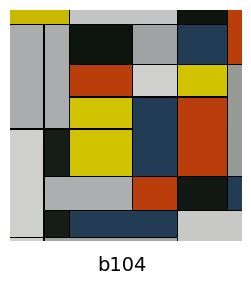

In [7]:
draw_mondrian('b104')

We went from art to data and back again. Cool!

### Comparing Complexity

As mentioned earlier, Piet Mondrian was part of a movement to simplify artistic expression. Do Mondrian paintings vary substantially in their simplicity?

Let's use our `draw_mondrian()` function to draw two separate paintings and see if we notice any differences in complexity.

Activity Goal:
- Draw two separate Mondrain paintings.


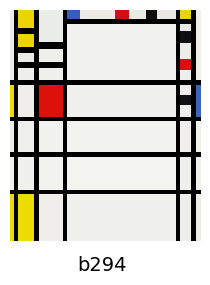

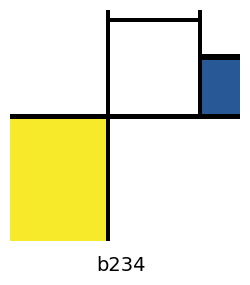

In [8]:
draw_mondrian('b294')
draw_mondrian('b234')

The left painting is more complex due to having more horizontal lines, vertical lines, and rectangles.

### Quantifying Complexity
Art researchers have used a variety of approaches to quantify the complexity of Mondrian paintings. Perhaps the easiest method is to simply count the number of features in a given painting. Let's explore this basic metric and see if we encounter any interesting trends over time.

As a reminder, here is the `features` dataframe.

In [9]:
pd.options.display.max_rows = 6
features

,painting_id,feature,x,y,width,height,color,rgb
0,b104,rect,0,0,146,13,white,#ced2ca
1,b104,rect,151,0,576,13,gray,#a4a7a7
2,b104,rect,732,0,278,129,gray,#c8c9c7
...,...,...,...,...,...,...,...,...
3201,b296,h-line,0,268,711,19,black,#000000
3202,b296,h-line,0,489,711,19,black,#000000
3203,b296,h-line,0,679,11,28,black,#000000


To count the number of features for each painting, let's use `df.groupby()`.

Activity Goals:
- Group the features by painting_id.
- Count the number of rows in each group.
- Display the counts.

In [10]:
pd.options.display.max_rows = 10
sizes = features.groupby('painting_id').size()
sizes #display the result


,0
painting_id,
b104,41
b105,42
b106,41
b107,44
b108,44
...,...
b292,31
b293,26
b294,62


This gives us the number of features for all 136 paintings. The output above is a 1-dimensional series where the index is the `painting_id`.

Let's turn the series into a dataframe by calling `reset_index( )`.

In [11]:
complexity_df = sizes.reset_index(name='complexity')
complexity_df

,painting_id,complexity
0,b104,41
1,b105,42
2,b106,41
3,b107,44
4,b108,44
...,...,...
131,b292,31
132,b293,26
133,b294,62
134,b295,47


This gives us a dataframe with the complexity (number of features) for each painting ID. null We now have complexity data for all 136 paintings.

### Merging Data
We want to plot complexity over time, but currently we have complexity in one dataframe and the year in a different dataframe.

In [12]:
pd.options.display.max_rows = 6
complexity_df

,painting_id,complexity
0,b104,41
1,b105,42
2,b106,41
...,...,...
133,b294,62
134,b295,47
135,b296,49


In [13]:
painting_info


,painting_id,year,title,width,height
0,b104,1920,No. VI,1010,1007
1,b105,1920,Composition A,918,900
2,b106,1920,Composition B,575,677
...,...,...,...,...,...
133,b294,1939,Trafalgar Square,1200,1452
134,b295,1939,Composition no. 8,681,752
135,b296,1940,Composition no. 11,711,825


Let's add the complexity data into the `painting_info` dataframe using a left merge. This will allow us to plot how complexity changes by year.

Merging dataframes in Pandas is like joining tables in SQL. We need to specify which columns will be used to find matching rows. In our case, each row for both dataframes represents a single painting. Rows can be matched using the `painting_id` column.

Activity Goals:
- Merge `complexity_df` into `painting_info`.
- Display the result.

In [14]:
pd.options.display.max_rows = 10
painting_info = painting_info.merge(complexity_df, on='painting_id', how='left')
painting_info

,painting_id,year,title,width,height,complexity
0,b104,1920,No. VI,1010,1007,41
1,b105,1920,Composition A,918,900,42
2,b106,1920,Composition B,575,677,41
3,b107,1920,Composition C,610,603,44
4,b108,1920,Composition I,646,750,44
...,...,...,...,...,...,...
131,b292,1939,Composition no. 1,1023,1052,31
132,b293,1939,"Composition of red, blue and white: II",330,435,26
133,b294,1939,Trafalgar Square,1200,1452,62
134,b295,1939,Composition no. 8,681,752,47


We have now merged the `complexity_df` into `painting_info`.

### Plotting Complexity over Time
Are you ready to make some graphs?

Let's visualize how complexity changes over the years for these Mondrian paintings. A scatterplot would work well for this.

Activity Goals:
- Import matplotlib.pyplot.
- Create a scatterplot of complexity over time.
- Label the axes.

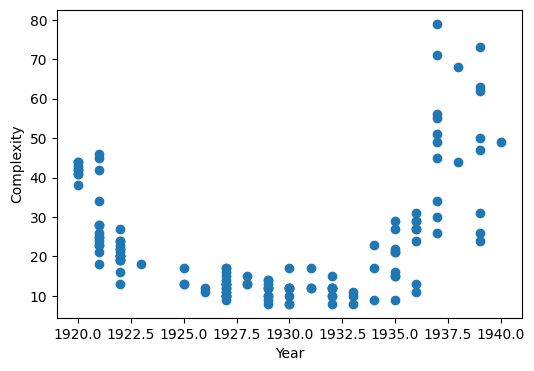

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(painting_info['year'], painting_info['complexity'])
plt.xlabel('Year')
plt.ylabel('Complexity')
plt.show()

The complexity of Mondrian's paintings increases after 1935, indicating a shift in his artistic style.

### Detecting Possible Fake Paintings
Since Mondrian paintings can sell for millions of dollars, it's not hard to imagine that someone might try to create a forgery. The following is a widely shared painting claimed to be a Mondrian artwork from 1926.

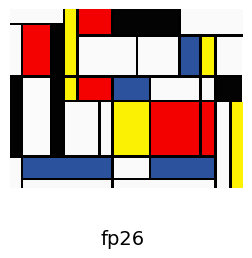

In [16]:
# code to plot the figure
rects = pd.read_csv('fp26-features.csv')
total_width = rects.eval("x + width").max()
total_height = rects.eval("y + height").max()

fig, ax = plt.subplots(figsize=(3, 3))

for (idx, row) in rects.iterrows():
	x, y, w, h, rgb = row[['x','y','width','height','rgb']]
	patch = mpatches.Rectangle((x, y), w, h, facecolor=rgb)
	ax.add_patch(patch)

ax.axis([0, total_width, 0, total_height])
ax.set_aspect('equal')
ax.axis('off')
fig.text(0.5, 0.01, 'fp26', ha="center", fontsize=14)
plt.show()


This painting doesn't show up in our catalog. Is it real or fake? Let's see what evidence we can glean from the data.

Load up the feature data for this painting from the file `fp26-features.csv`.

Activity Goals:
- Load the features for fake painting 1926.
- Display the Dataframe.

In [17]:
fp26_features = pd.read_csv('fp26-features.csv')
fp26_features

,painting_id,feature,x,y,width,height,color,rgb
0,fp26,rect,0,0,34,92,white,#fafafa
1,fp26,rect,41,0,267,22,white,#f9f9f9
2,fp26,rect,317,0,309,22,white,#fafafa
3,fp26,rect,634,0,38,261,white,#fafafa
4,fp26,rect,680,0,32,261,yellow,#fcf202
...,...,...,...,...,...,...,...,...
49,fp26,h-line,206,462,506,8,black,#000000
50,fp26,h-line,0,497,166,8,black,#000000
51,fp26,v-line,270,96,9,169,black,#000000
52,fp26,v-line,580,96,7,370,black,#000000


Using our number of features metric for complexity, we can see that this painting has a complexity of 54.

Is a complexity of 54 consistent with other Mondrain paintings in the year 1926? Let's add this datapoint to our scatterplot for a visual comparison.

Activity Goals:
- Recreate the scatterplot from earlier.
- Plot the new point as a red square.
- Label the axes.

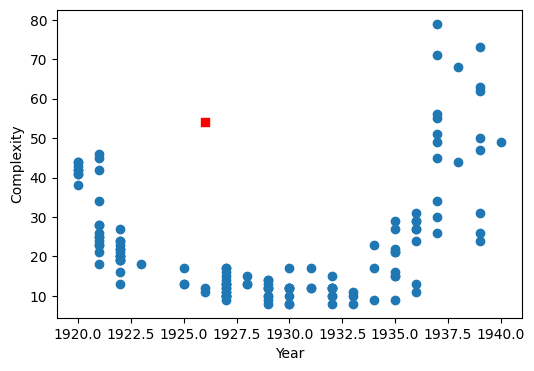

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(painting_info['year'], painting_info['complexity'])
plt.scatter(x=1926, y=54, color='red', marker='s')
plt.xlabel('Year')
plt.ylabel('Complexity')
plt.show()


The 1926 painting is an outlier with much higher complexity than other paintings from that period, suggesting it might be a fake.


## Project extensions

Here are some ideas for extending the project:

1. **Analyze painting dimensions over time**  
    
    Plot the length, width, or area of each painting against its creation date. Are there any noticeable trends or patterns?

2. **Track blue color usage over time**  
   - Compute the total area of each painting using data from `painting_info`.  

   - Identify features in the dataset where the color is 'blue'.

   - Calculate the area of these blue features.  

   - Group the blue feature areas by `painting_id` and sum them.

   - Merge this data with `painting_info`.  

   - Plot the percentage of blue in each painting over time.

   - Repeat with other colors (red, yellow, white, black, gray)

In [20]:
# YOUR CODE HERE (add new cells as needed)
painting_info['area'] = painting_info['width'] * painting_info['height']
display(painting_info.head())

,painting_id,year,title,width,height,complexity,area
0,b104,1920,No. VI,1010,1007,41,1017070
1,b105,1920,Composition A,918,900,42,826200
2,b106,1920,Composition B,575,677,41,389275
3,b107,1920,Composition C,610,603,44,367830
4,b108,1920,Composition I,646,750,44,484500


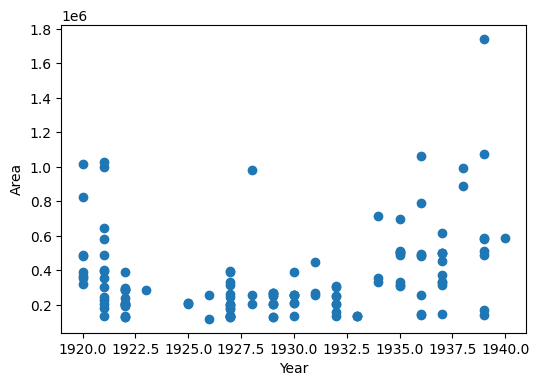

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(painting_info['year'], painting_info['area'])
plt.xlabel('Year')
plt.ylabel('Area')
plt.show()

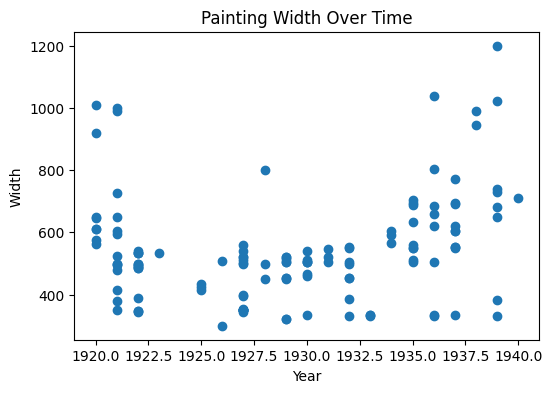

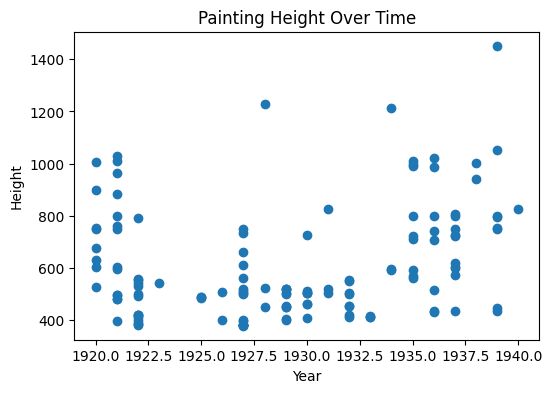

In [25]:
plt.figure(figsize=(6, 4))
plt.scatter(painting_info['year'], painting_info['width'])
plt.xlabel('Year')
plt.ylabel('Width')
plt.title('Painting Width Over Time')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(painting_info['year'], painting_info['height'])
plt.xlabel('Year')
plt.ylabel('Height')
plt.title('Painting Height Over Time')
plt.show()

The potential fake painting from 1926 stands out as a clear outlier in terms of complexity, having significantly more features than other paintings from that period. This further supports the idea that it might not be an authentic Mondrian.

# Task
Analyze the percentage of different colors (blue, red, yellow, white, black, gray) in paintings over time. Calculate the percentage of each color for each painting, plot the percentage of each color against the year, and summarize any observed trends.

## Calculate total painting area

### Subtask:
Ensure the total area of each painting is available in the `painting_info` DataFrame.


**Reasoning**:
Calculate the area for each painting and add it as a new column to the painting_info dataframe. Then display the updated dataframe.



In [32]:
painting_info['area'] = painting_info['width'] * painting_info['height']
display(painting_info.head())

,painting_id,year,title,width,height,complexity,area
0,b104,1920,No. VI,1010,1007,41,1017070
1,b105,1920,Composition A,918,900,42,826200
2,b106,1920,Composition B,575,677,41,389275
3,b107,1920,Composition C,610,603,44,367830
4,b108,1920,Composition I,646,750,44,484500


## Filter for blue features

### Subtask:
Create a new DataFrame containing only the features where the color is 'blue' from the `features` DataFrame.


**Reasoning**:
Filter the `features` DataFrame to select rows where the 'color' column is equal to 'blue', store the result in `blue_features`, and display the head of the new DataFrame.



In [34]:
blue_features = features.query('color == "blue"').copy()
blue_features.head()

,painting_id,feature,x,y,width,height,color,rgb
5,b104,rect,263,18,464,111,blue,#233c55
9,b104,rect,949,134,61,143,blue,#233c55
12,b104,rect,536,282,191,343,blue,#233c55
23,b104,rect,732,771,212,172,blue,#233c55
49,b105,rect,582,143,218,69,blue,#36477a


## Calculate blue feature area

### Subtask:
For the blue features, calculate the area of each feature using the `width` and `height` columns.


**Reasoning**:
Calculate the area for each blue feature and store it in a new column named 'area' in the blue_features DataFrame.



In [35]:
blue_features['area'] = blue_features['width'] * blue_features['height']
display(blue_features.head())

,painting_id,feature,x,y,width,height,color,rgb,area
5,b104,rect,263,18,464,111,blue,#233c55,51504
9,b104,rect,949,134,61,143,blue,#233c55,8723
12,b104,rect,536,282,191,343,blue,#233c55,65513
23,b104,rect,732,771,212,172,blue,#233c55,36464
49,b105,rect,582,143,218,69,blue,#36477a,15042


## Sum blue area per painting

### Subtask:
Group the blue feature areas by `painting_id` and sum the areas for each painting.


**Reasoning**:
Group the blue features by painting_id and sum their areas, then reset the index and rename the resulting column.



In [36]:
blue_area_by_painting = blue_features.groupby('painting_id')['area'].sum().reset_index(name='blue_area')
display(blue_area_by_painting.head())

,painting_id,blue_area
0,b104,162204
1,b105,98645
2,b106,87395
3,b107,98919
4,b108,47813


## Merge blue area data

### Subtask:
Merge the calculated total blue area for each painting into the `painting_info` DataFrame.


**Reasoning**:
Merge the blue area data into the painting information dataframe and display the result.



In [37]:
painting_info = painting_info.merge(blue_area_by_painting, on='painting_id', how='left')
display(painting_info.head())

,painting_id,year,title,width,height,complexity,area,blue_area
0,b104,1920,No. VI,1010,1007,41,1017070,162204.0
1,b105,1920,Composition A,918,900,42,826200,98645.0
2,b106,1920,Composition B,575,677,41,389275,87395.0
3,b107,1920,Composition C,610,603,44,367830,98919.0
4,b108,1920,Composition I,646,750,44,484500,47813.0


## Calculate percentage of blue

### Subtask:
Calculate the percentage of blue area for each painting by dividing the total blue area by the total painting area.


**Reasoning**:
Calculate the percentage of blue area for each painting and store it in a new column.



In [38]:
painting_info['blue_percentage'] = (painting_info['blue_area'] / painting_info['area']) * 100
display(painting_info.head())

,painting_id,year,title,width,height,complexity,area,blue_area,blue_percentage
0,b104,1920,No. VI,1010,1007,41,1017070,162204.0,15.948165
1,b105,1920,Composition A,918,900,42,826200,98645.0,11.939603
2,b106,1920,Composition B,575,677,41,389275,87395.0,22.450710
3,b107,1920,Composition C,610,603,44,367830,98919.0,26.892586
4,b108,1920,Composition I,646,750,44,484500,47813.0,9.868524


## Plot percentage of blue over time

### Subtask:
Create a scatter plot showing the percentage of blue in each painting against the year.


**Reasoning**:
Create a scatter plot to visualize the percentage of blue in each painting against the year.



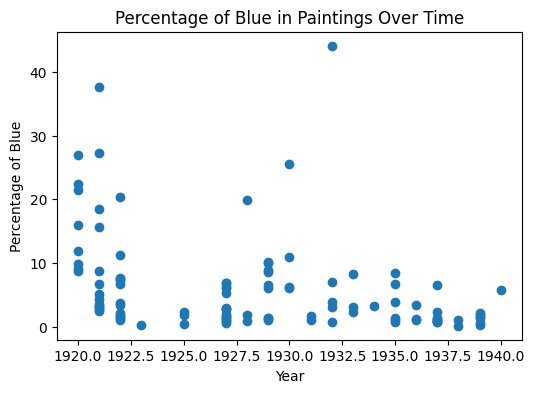

In [39]:
plt.figure(figsize=(6, 4))
plt.scatter(painting_info['year'], painting_info['blue_percentage'])
plt.xlabel('Year')
plt.ylabel('Percentage of Blue')
plt.title('Percentage of Blue in Paintings Over Time')
plt.show()

## Repeat for other colors

### Subtask:
Adapt the steps to calculate and plot the percentage of other colors (red, yellow, white, black, gray) over time.


**Reasoning**:
Iterate through the specified colors, filter the features, calculate the area for each feature, sum the area by painting, merge the color area into painting_info, calculate the percentage, and plot the percentage over time.



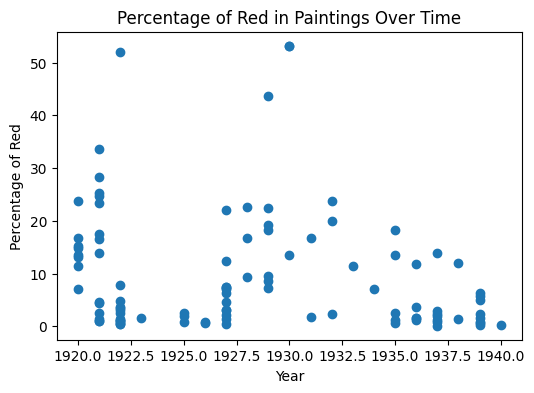

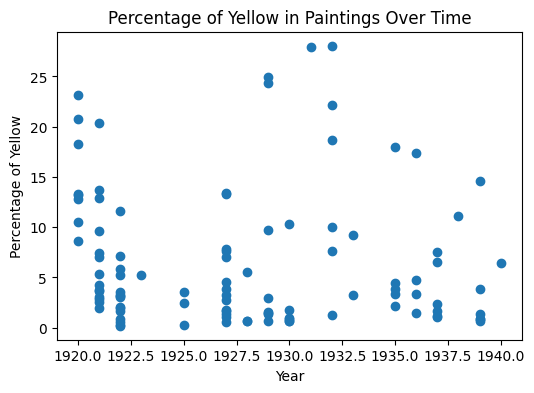

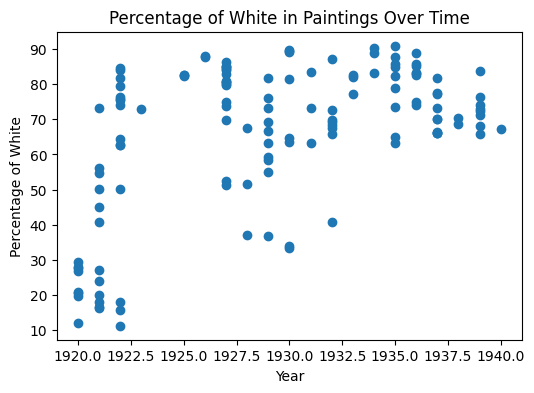

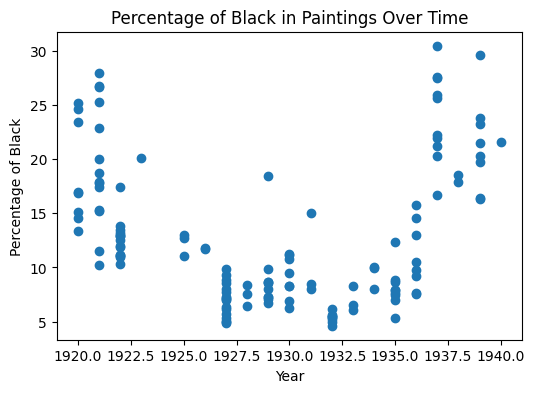

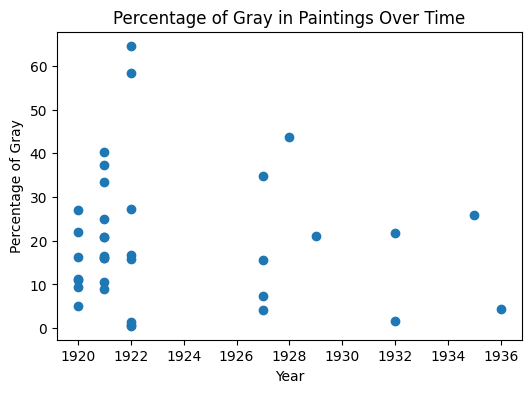

In [40]:
colors_to_analyze = ['red', 'yellow', 'white', 'black', 'gray']

for color in colors_to_analyze:
    color_features = features.query('color == @color').copy()
    color_features['area'] = color_features['width'] * color_features['height']
    color_area_by_painting = color_features.groupby('painting_id')['area'].sum().reset_index(name=f'{color}_area')
    painting_info = painting_info.merge(color_area_by_painting, on='painting_id', how='left')
    painting_info[f'{color}_percentage'] = (painting_info[f'{color}_area'] / painting_info['area']) * 100

    plt.figure(figsize=(6, 4))
    plt.scatter(painting_info['year'], painting_info[f'{color}_percentage'])
    plt.xlabel('Year')
    plt.ylabel(f'Percentage of {color.capitalize()}')
    plt.title(f'Percentage of {color.capitalize()} in Paintings Over Time')
    plt.show()

## Summarize findings

### Subtask:
Analyze the plots and summarize any trends or patterns in color usage over time.


## Summary:

### Data Analysis Key Findings

*   White and black consistently represent a significant portion of the paintings throughout the period (1920-1940).
*   Red, yellow, and blue show more variability in their percentage over time compared to white and black.
*   Gray appears infrequently and in very small percentages.

### Insights or Next Steps

*   Investigate specific periods where the percentages of red, yellow, and blue show notable peaks or dips to understand potential artistic shifts.
*   Analyze the spatial distribution of these colors within the paintings to see if there are trends in how they are used in relation to each other or the overall composition.
